In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('survey.csv')
df1.head()

#created the first data file as df1 so that I can merge it with the 2nd later

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
df2 = pd.read_csv('steps-v2.csv', sep=';')
df2.head()

#same as step 1, but for the other df

,id,20-06-2013,21-06-2013,22-06-2013,23-06-2013,24-06-2013,25-06-2013,26-06-2013,27-06-2013,28-06-2013,...,04-05-2014,05-05-2014,06-05-2014,07-05-2014,08-05-2014,09-05-2014,10-05-2014,11-05-2014,12-05-2014,13-05-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.merge(df1, df2, on = 'id')
df.head()

#merging the two dataframes who both has a variable 'id', this is the common identifier

,id,city,gender,age,hh_size,education,education_1,height,weight,20-06-2013,...,04-05-2014,05-05-2014,06-05-2014,07-05-2014,08-05-2014,09-05-2014,10-05-2014,11-05-2014,12-05-2014,13-05-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# see what kind of numbers I have in the Weight column. If there are any weird ones, I can delete them later

df['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
101.0     1
20.0      1
700.0     1
37.0      1
6.0       1
Name: weight, Length: 72, dtype: int64

In [5]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.

# so yeah I copied the comments above from the example, but that's basicly what I'm doing here

df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

# Here I create a function to replace all values above 200 to NaN
def above_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
    
#applying the function to the weight variable, because WHO IS HEAVIER THAN 200KG RIGHT? SEEK HELP PEOPLE!
    
df['weight'] = df['weight'].apply(above_200)

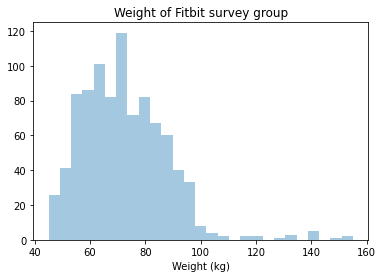

In [19]:
# So copied this code to make a bar chart

sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of Fitbit survey group')
plt.xlabel('Weight (kg)')
plt.show()

In [7]:
# So basicly I'm doing the same here, but I replace all anorexian people with NaN

def below_40(x):
    if(x < 40.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_40)

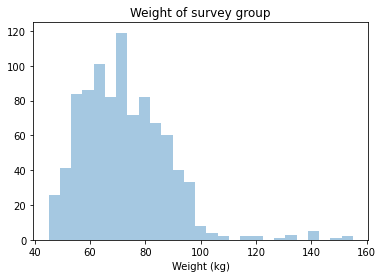

In [8]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of Fitbit survey group')
plt.xlabel('Weight (kg)')
plt.show()

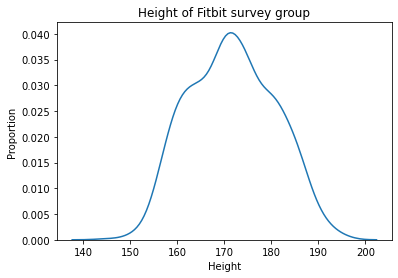

In [20]:
# Making another graph, more or less the same code as before, but using the Height of the group

sns.distplot(df["height"], hist=False, kde=True)
plt.title("Height of Fitbit survey group")
plt.xlabel("Height (cm)")
plt.ylabel("Proportion")
plt.show()

In [15]:
steps_subset = df.loc[:, "20-06-2013":"13-04-2014"].mean()

#I subsetted a new df to focus on the steps

Index(['20-06-2013', '21-06-2013', '22-06-2013', '23-06-2013', '24-06-2013',
       '25-06-2013', '26-06-2013', '27-06-2013', '28-06-2013', '29-06-2013',
       ...
       '04-04-2014', '05-04-2014', '06-04-2014', '07-04-2014', '08-04-2014',
       '09-04-2014', '10-04-2014', '11-04-2014', '12-04-2014', '13-04-2014'],
      dtype='object', length=298)

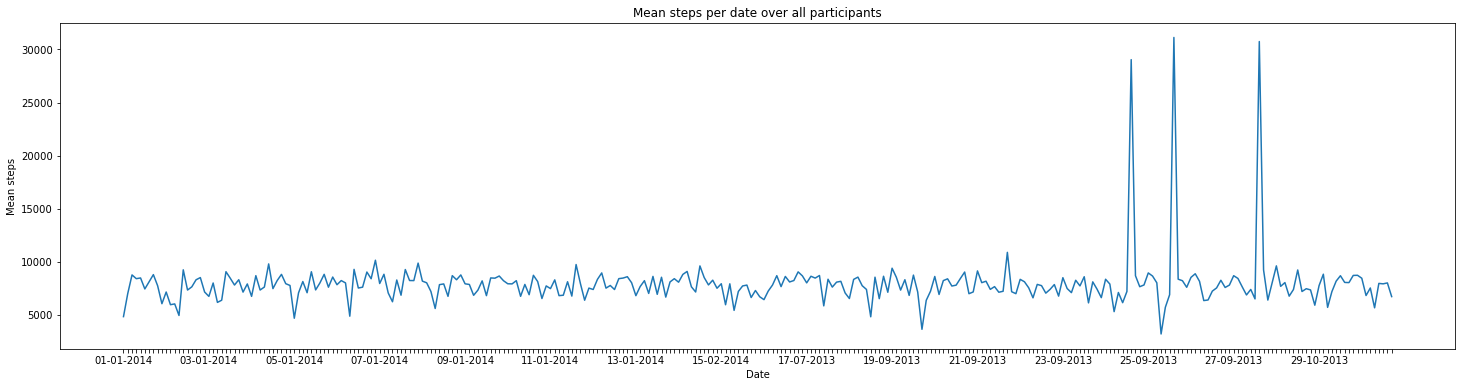

In [23]:
plt.figure(figsize=(25, 6)) #set the figure ("canvas") size
plot = sns.lineplot(x=steps_subset.index, y=steps_subset) #create the plot

# the next part I completely compied from the Assignment answer and added it later, but I get the code

#Now a tricky part. If we plot all the dates, they overlap. So we need to make some ticks invisible. 

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Mean steps per date over all participants") #set the title
plt.xlabel("Date") #set the x-label
plt.ylabel("Mean steps") #set the y-label

plt.show() #show the plot

In [26]:
# To summerize:
# what is the mean of the height?

mean = df['height'].mean()
mean

171.66810344827587

In [24]:
# what is the median of the height?

median = df['height'].median()
median

172.0

In [28]:
# what is the median of the variance?

variance = df['height'].var()
variance

82.45067514786287

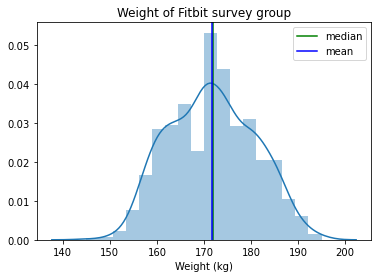

In [37]:
# creating a new bar chart with the lines of the median and mean in it

sns.distplot(df['height'].dropna()) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of Fitbit survey group')
plt.xlabel('Weight (kg)')
plt.axvline(median, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()